In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
file_path = '../data/city_pairs.csv'

In [3]:
import pandas as pd

df = pd.read_csv(file_path)
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89320 entries, 0 to 89319
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Month                   89320 non-null  object 
 1   AustralianPort          89320 non-null  object 
 2   ForeignPort             89320 non-null  object 
 3   Country                 89320 non-null  object 
 4   Passengers_In           89320 non-null  int64  
 5   Freight_In_(tonnes)     89320 non-null  float64
 6   Mail_In_(tonnes)        89320 non-null  float64
 7   Passengers_Out          89320 non-null  int64  
 8   Freight_Out_(tonnes)    89320 non-null  float64
 9   Mail_Out_(tonnes)       89320 non-null  float64
 10  Passengers_Total        89320 non-null  int64  
 11  Freight_Total_(tonnes)  89320 non-null  float64
 12  Mail_Total_(tonnes)     89320 non-null  float64
 13  Year                    89320 non-null  int64  
 14  Month_num               89320 non-null

In [4]:
df.isnull().sum()
df.describe()


,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Passengers_Total,Freight_Total_(tonnes),Mail_Total_(tonnes),Year,Month_num
count,89320.000000,89320.000000,89320.000000,89320.000000,89320.000000,89320.000000,89320.000000,89320.000000,89320.000000,89320.000000,89320.000000
mean,4561.972380,167.342670,7.442728,4491.480743,148.406850,4.628451,9053.453124,315.749520,12.071179,2003.077541,6.498959
std,8564.725065,407.415238,23.809746,8416.198365,363.853783,14.769693,16905.519449,728.108373,34.345207,11.222014,3.472430
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1985.000000,1.000000
25%,128.000000,0.002000,0.000000,133.000000,0.011750,0.000000,284.000000,0.781000,0.000000,1994.000000,3.000000
50%,1290.000000,14.962000,0.000000,1265.000000,14.072000,0.000000,2573.000000,43.536000,0.105000,2001.000000,7.000000
75%,4831.000000,136.583750,1.703000,4698.250000,118.125500,1.551250,9614.000000,275.003250,4.932000,2013.000000,10.000000
max,90926.000000,6764.923000,393.705000,91078.000000,4996.582000,382.229000,170469.000000,9889.553000,566.993000,2025.000000,12.000000


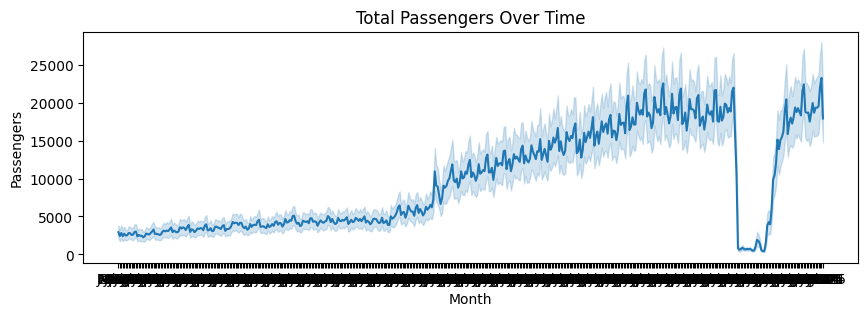

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,3))
sns.lineplot(data=df, x='Month', y='Passengers_Total')
plt.title('Total Passengers Over Time')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.savefig('../images/passengers_over_time.png', bbox_inches='tight')
plt.show()


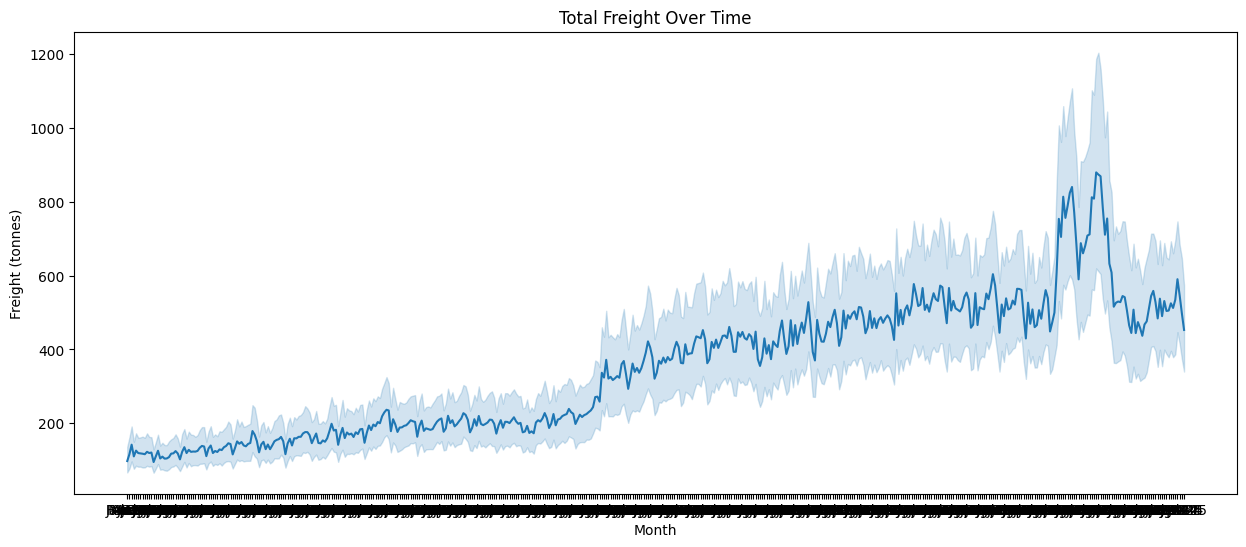

In [6]:
plt.figure(figsize=(15,6))
sns.lineplot(data=df, x='Month', y='Freight_Total_(tonnes)')
plt.title('Total Freight Over Time')
plt.xlabel('Month')
plt.ylabel('Freight (tonnes)')
plt.savefig('../images/freight_over_time.png', bbox_inches='tight')
plt.show()


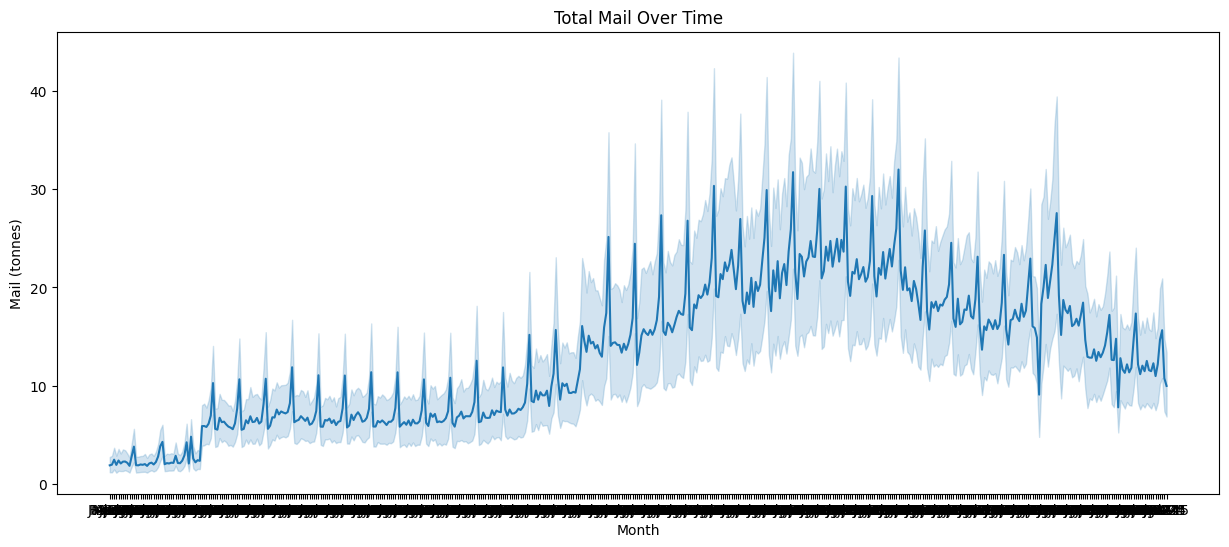

In [7]:
plt.figure(figsize=(15,6))
sns.lineplot(data=df, x='Month', y='Mail_Total_(tonnes)')
plt.title('Total Mail Over Time')
plt.xlabel('Month')
plt.ylabel('Mail (tonnes)')
plt.savefig('../images/mail_over_time.png', bbox_inches='tight')
plt.show()


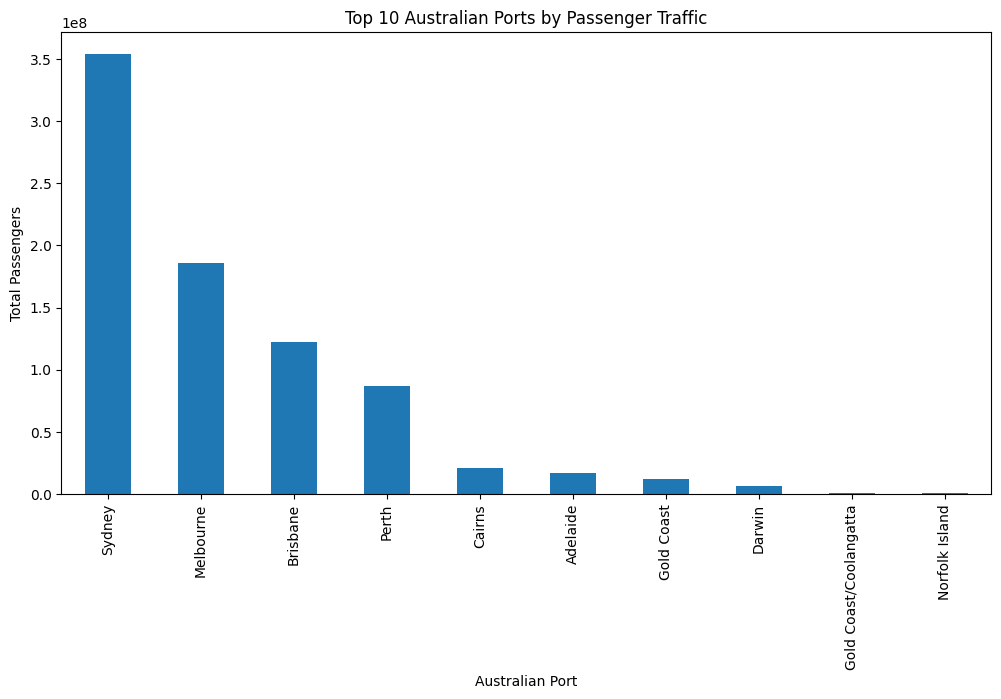

In [8]:

top_ports = (
    df.groupby('AustralianPort')['Passengers_Total']
    .sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(12,6))
top_ports.head(10).plot(kind='bar')
plt.title('Top 10 Australian Ports by Passenger Traffic')
plt.ylabel('Total Passengers')
plt.xlabel('Australian Port')
plt.savefig('../images/top_ports.png', bbox_inches='tight')

plt.show()


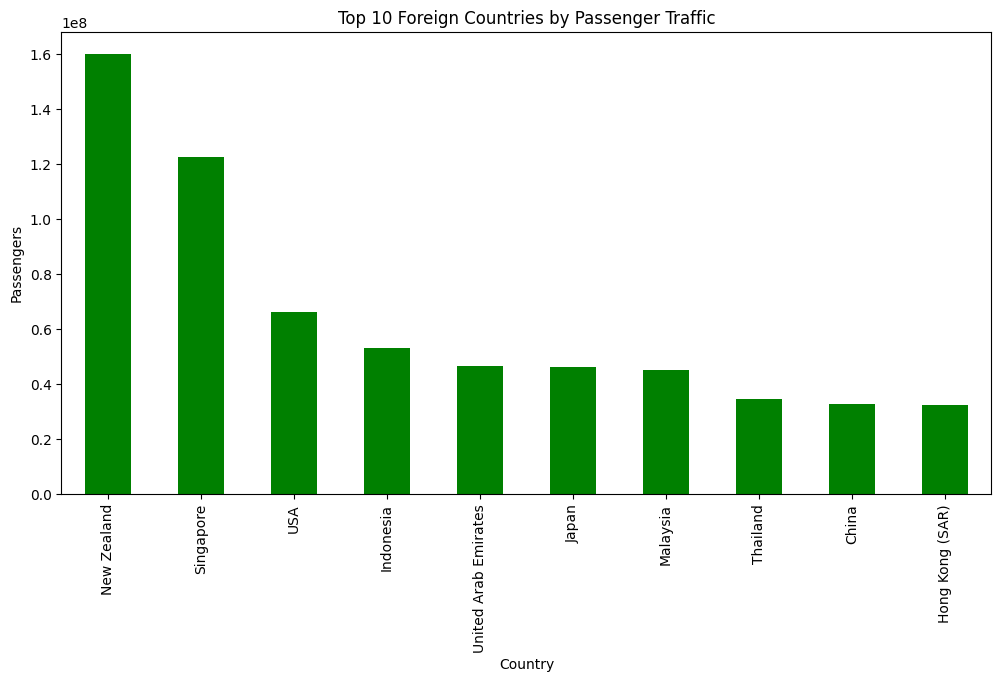

In [9]:
top_countries = (
    df.groupby('Country')['Passengers_Total']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(12,6))
top_countries.plot(kind='bar', color='green')
plt.title('Top 10 Foreign Countries by Passenger Traffic')
plt.ylabel('Passengers')
plt.xlabel('Country')
plt.savefig('../images/top_countries.png', bbox_inches='tight')
plt.show()



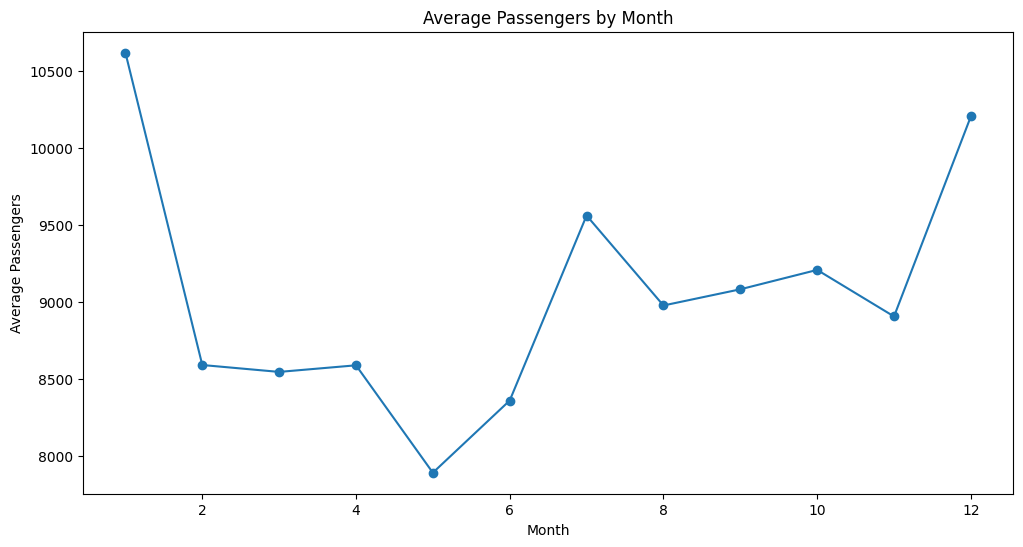

In [10]:
monthly_passengers = df.groupby('Month_num')['Passengers_Total'].mean()
monthly_passengers.plot(kind='line', figsize=(12,6), marker='o')
plt.title('Average Passengers by Month')
plt.xlabel('Month')
plt.ylabel('Average Passengers')
plt.savefig('../images/average_passengers_by_month.png', bbox_inches='tight')
plt.show()


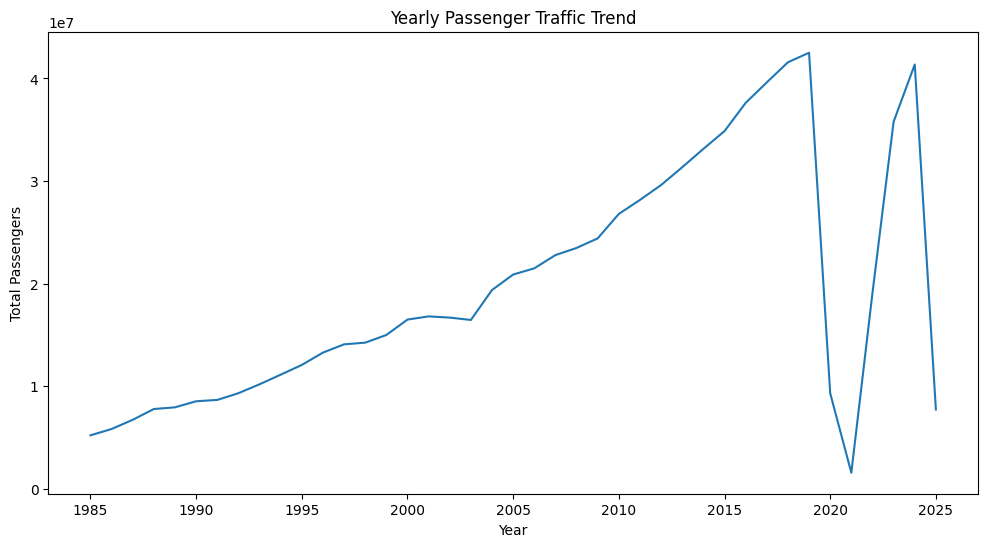

In [11]:
yearly_trend = df.groupby('Year')['Passengers_Total'].sum()

plt.figure(figsize=(12,6))
yearly_trend.plot()
plt.title('Yearly Passenger Traffic Trend')
plt.ylabel('Total Passengers')
plt.xlabel('Year')
plt.savefig('../images/yearly_passenger_trend.png', bbox_inches='tight')
plt.show()


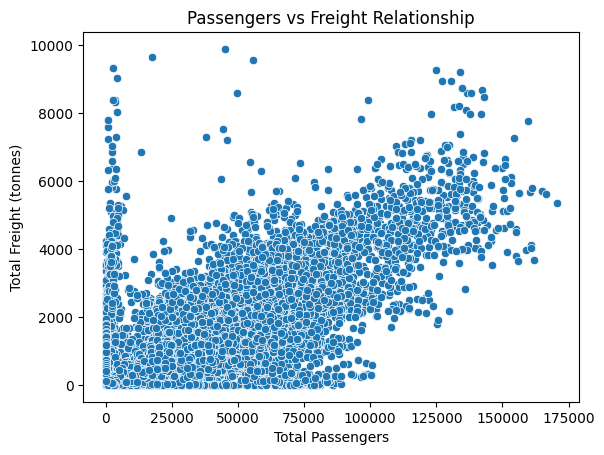

In [12]:
sns.scatterplot(
    data=df,
    x='Passengers_Total',
    y='Freight_Total_(tonnes)'
)
plt.title('Passengers vs Freight Relationship')
plt.xlabel('Total Passengers')
plt.ylabel('Total Freight (tonnes)')
plt.savefig('../images/passengers_vs_freight.png', bbox_inches='tight')
plt.show()


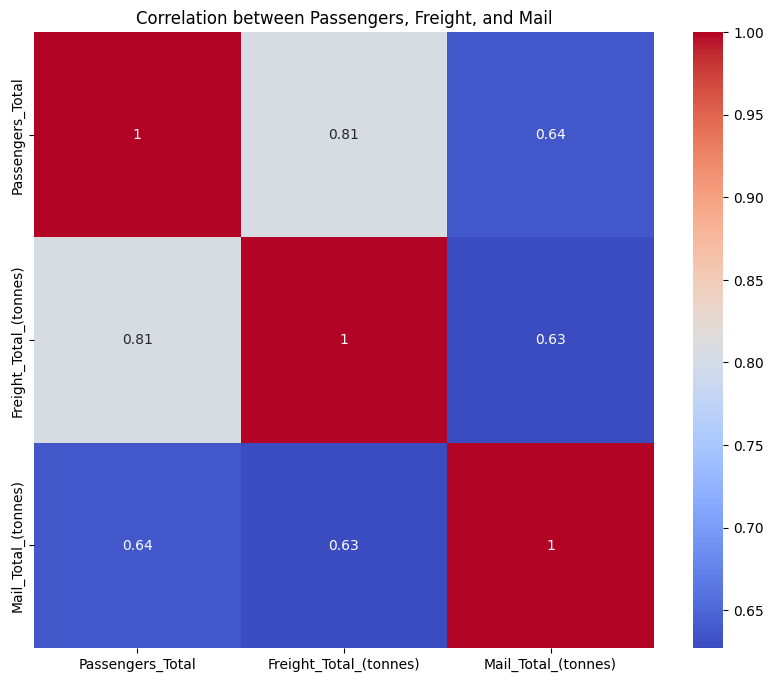

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(df[['Passengers_Total','Freight_Total_(tonnes)','Mail_Total_(tonnes)']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Passengers, Freight, and Mail')
plt.savefig('../images/correlation_heatmap.png', bbox_inches='tight')
plt.show()
